## Setup

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import filter_toolbox
from scipy.signal import find_peaks
import Interface as mi
import numpy as np 
from Pipeline import Pipeline as model_pipeline
from scipy.signal import find_peaks 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV para carregar a imagem
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.signal import find_peaks 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [15]:
filter_intensity = 0.2

In [16]:
kernel_param = [mi.KernelParam(size=17, sigma=3), 
                  mi.KernelParam(size=5, sigma=3), 
                  mi.KernelParam(size=10, sigma=3),
                  mi.KernelParam(size=5, sigma=5),
                  mi.KernelParam(size=7, sigma=7),
                  mi.KernelParam(size=18, sigma=5),
                  mi.KernelParam(size=18, sigma=13),
                  mi.KernelParam(size=18, sigma=11),
                  mi.KernelParam(size=20, sigma=13),
                  mi.KernelParam(size=23, sigma=13),
                  mi.KernelParam(size=23, sigma=15),
                  mi.KernelParam(size=30, sigma=15),
                  mi.KernelParam(size=35, sigma=15),
                  mi.KernelParam(size=30, sigma=25),
                  mi.KernelParam(size=35, sigma=25)
                ]


In [17]:
image_coords = []

In [18]:
teste = 0

## T1

In [19]:
img_path = r"data\sdss\sdss_image_180.171408773627_0.35639930317447.jpg"

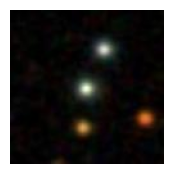

In [20]:
# Carregar a imagem
img = mpimg.imread(img_path)

# Criar uma nova figura
plt.figure(figsize=(2, 2))  # O argumento figsize define o tamanho da figura

# Exibir a imagem
plt.imshow(img)

# Remover os eixos
plt.axis('off')

# Mostrar a figura
plt.show()

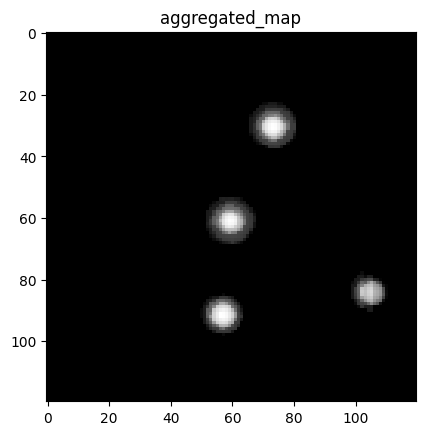

In [21]:
input_data = mi.PipelineInput(
    img_path = img_path,
    filter_intensity=filter_intensity,
    kernel_param= kernel_param, #[mi.KernelParam(size=17, sigma=3)],
    agg_type=np.mean
)
model = model_pipeline(is_debug=False)
agg=model.run(input_data=input_data)


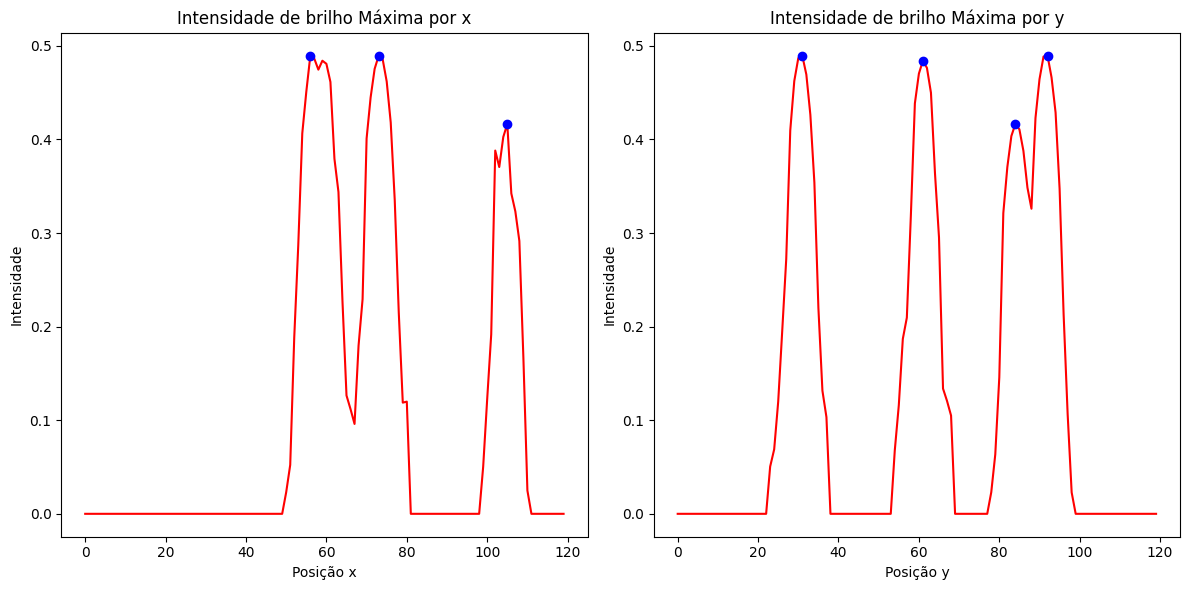

In [22]:
image = cv2.imread(img_path)

resultado_final = agg.map

# Obter a intensidade ao longo das dimensões x e y
intensity = np.stack(resultado_final, axis=0)

# Encontrar o valor máximo por linha (eixo y) e por coluna (eixo x)
max_by_x = intensity.max(axis=0)  # Máximo ao longo da dimensão y (colunas)
max_by_y = intensity.max(axis=1)  # Máximo ao longo da dimensão x (linhas)

# Obter os valores de x e y
x_values = np.arange(intensity.shape[1])
y_values = np.arange(intensity.shape[0])

# Encontrar picos para a curva de intensidade por x e y
prominence_x = 0.15 * max(max_by_x)  # Prominência de 15% do valor máximo
prominence_y = 0.15 * max(max_by_y)  # Prominência de 15% do valor máximo

peaks_x, _ = find_peaks(max_by_x, prominence=prominence_x, height=0.55 * max(max_by_x))
peaks_y, _ = find_peaks(max_by_y, prominence=prominence_y, height=0.55 * max(max_by_y))

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar a curva de intensidade por x
plt.subplot(1, 2, 1)
plt.plot(x_values, max_by_x, color='red')
plt.plot(x_values[peaks_x], max_by_x[peaks_x], 'bo', label='Picos')
plt.title('Intensidade de brilho Máxima por x')
plt.xlabel('Posição x')
plt.ylabel('Intensidade')

# Plotar a curva de intensidade por y
plt.subplot(1, 2, 2)
plt.plot(y_values, max_by_y, color='red')
plt.plot(y_values[peaks_y], max_by_y[peaks_y], 'bo', label='Picos')
plt.title('Intensidade de brilho Máxima por y')
plt.xlabel('Posição y')
plt.ylabel('Intensidade')

plt.tight_layout()
plt.show()

In [23]:
# Encontrar os pares de coordenadas onde há picos nos dois eixos
# Percorrer o mapa de intensidade para verificar onde os picos de x e y coincidem
peak_coords = [(x, y) for y in peaks_y for x in peaks_x if intensity[y, x] >= 0.55 * intensity.max()]

peak_coords

[(73, 31), (56, 61), (105, 84), (56, 92)]

In [24]:
image_coords.append({
    "image_path": img_path,
    "positions": [{"x": float(x), "y": float(y)} for x, y in peak_coords]
})

Imagem salva em: kernel_param/similaridade/T1_sdss_image_180.171408773627_0.35639930317447.jpg


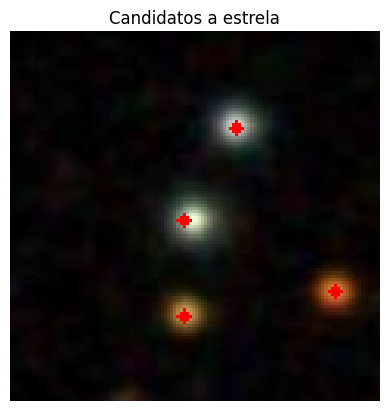

In [25]:
teste += 1

# Desenhar pontos nas coordenadas dos picos encontrados
for (x, y) in peak_coords:
    center = (int(x), int(y))  # Coordenadas (x, y)
    color = (0, 0, 255)  # Cor (vermelho em BGR)
    thickness = -1  # Espessura do ponto, negativo preenche o marcador
    cv2.circle(image, center, 2, color, thickness)  # Desenha um ponto com raio 2

file_name = os.path.basename(img_path)
output_path = f'kernel_param/similaridade/T{teste}_{file_name}'

# Salvar a imagem
cv2.imwrite(output_path, image)
print(f"Imagem salva em: {output_path}")

# Mostrar a imagem com os pontos
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Candidatos a estrela')
plt.axis('off')
plt.show()


In [26]:
print("Foram detectadas ", len(peak_coords), " estrelas na imagem.") 

Foram detectadas  4  estrelas na imagem.
